In [23]:
!pip install lightgbm
!pip install xgboost
!pip install catboost
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import scipy.stats as stats
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [24]:
df = pd.read_csv("melbourne_housing.csv")

In [25]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/9/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/2/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/2/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/3/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [27]:
df.shape

(34857, 21)

In [28]:
df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

# Data Preprocessing

In [29]:
df.drop_duplicates(inplace=True)

In [30]:
df.shape

(34856, 21)

In [31]:
round(df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Rooms,34856.0,3.03,0.97,1.00,2.00,3.00,4.00,16.00
Price,27247.0,1050173.34,641467.13,85000.00,635000.00,870000.00,1295000.00,11200000.00
Distance,34855.0,11.18,6.79,0.00,6.40,10.30,14.00,48.10
Postcode,34855.0,3116.06,109.03,3000.00,3051.00,3103.00,3156.00,3978.00
Bedroom2,26639.0,3.08,0.98,0.00,2.00,3.00,4.00,30.00
Bathroom,26630.0,1.62,0.72,0.00,1.00,2.00,2.00,12.00
Car,26128.0,1.73,1.01,0.00,1.00,2.00,2.00,26.00
Landsize,23046.0,593.61,3398.92,0.00,224.00,521.00,670.00,433014.00
BuildingArea,13741.0,160.25,401.28,0.00,102.00,136.00,188.00,44515.00
YearBuilt,15550.0,1965.29,37.33,1196.00,1940.00,1970.00,2000.00,2106.00


Instead of filling the missing values with mean or median, I will drop the missing values.

In [32]:
df.dropna(subset=["Price"],inplace=True)
df.reset_index(drop=True,inplace=True)

In [33]:
df.shape

(27247, 21)

Categorical or Numerical Features

In [34]:
# Kategorik özellikleri belirle
categorical_features = ['Rooms', 'Postcode']

# Numerik özellikleri belirle
numeric_features = ['Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']

# Belirtilen özellikleri kategorik olarak işaretle
df[categorical_features] = df[categorical_features].astype('category')

# Belirtilen özellikleri numerik olarak işaretle
df[numeric_features] = df[numeric_features].astype('float64')  # İsterseniz 'int' de kullanabilirsiniz

# DataFrame bilgilerini görüntüle
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27247 entries, 0 to 27246
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         27247 non-null  object  
 1   Address        27247 non-null  object  
 2   Rooms          27247 non-null  category
 3   Type           27247 non-null  object  
 4   Price          27247 non-null  float64 
 5   Method         27247 non-null  object  
 6   SellerG        27247 non-null  object  
 7   Date           27247 non-null  object  
 8   Distance       27246 non-null  float64 
 9   Postcode       27246 non-null  category
 10  Bedroom2       20806 non-null  float64 
 11  Bathroom       20800 non-null  float64 
 12  Car            20423 non-null  float64 
 13  Landsize       17982 non-null  float64 
 14  BuildingArea   10656 non-null  float64 
 15  YearBuilt      12084 non-null  float64 
 16  CouncilArea    27244 non-null  object  
 17  Lattitude      20993 non-null  

In [35]:
df.info

<bound method DataFrame.info of            Suburb           Address Rooms Type      Price Method  \
0      Abbotsford      85 Turner St     2    h  1480000.0      S   
1      Abbotsford   25 Bloomburg St     2    h  1035000.0      S   
2      Abbotsford      5 Charles St     3    h  1465000.0     SP   
3      Abbotsford  40 Federation La     3    h   850000.0     PI   
4      Abbotsford       55a Park St     4    h  1600000.0     VB   
...           ...               ...   ...  ...        ...    ...   
27242  Yarraville       13 Burns St     4    h  1480000.0     PI   
27243  Yarraville     29A Murray St     2    h   888000.0     SP   
27244  Yarraville    147A Severn St     2    t   705000.0      S   
27245  Yarraville  12/37 Stephen St     3    h  1140000.0     SP   
27246  Yarraville  3 Tarrengower St     2    h  1020000.0     PI   

             SellerG        Date  Distance Postcode  ...  Bathroom  Car  \
0             Biggin   3/12/2016       2.5   3067.0  ...       1.0  1.0   
1

In [36]:
# Eğer 'Rooms' veya 'Bedroom2' sütunları kategorik ise, numerik değere dönüştürün
df['Rooms'] = df['Rooms'].astype(float)
df['Bedroom2'] = df['Bedroom2'].astype(float)

df['Rooms v Bedroom2'] = df['Rooms'] - df['Bedroom2']
print(df["Rooms v Bedroom2"].head(10))

0    0.0
1    0.0
2    0.0
3    0.0
4    1.0
5    0.0
6   -1.0
7    0.0
8    NaN
9    NaN
Name: Rooms v Bedroom2, dtype: float64


In [37]:
df = df.drop(['Bedroom2','Rooms v Bedroom2'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27247 entries, 0 to 27246
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         27247 non-null  object  
 1   Address        27247 non-null  object  
 2   Rooms          27247 non-null  float64 
 3   Type           27247 non-null  object  
 4   Price          27247 non-null  float64 
 5   Method         27247 non-null  object  
 6   SellerG        27247 non-null  object  
 7   Date           27247 non-null  object  
 8   Distance       27246 non-null  float64 
 9   Postcode       27246 non-null  category
 10  Bathroom       20800 non-null  float64 
 11  Car            20423 non-null  float64 
 12  Landsize       17982 non-null  float64 
 13  BuildingArea   10656 non-null  float64 
 14  YearBuilt      12084 non-null  float64 
 15  CouncilArea    27244 non-null  object  
 16  Lattitude      20993 non-null  float64 
 17  Longtitude     20993 non-null  

Imputing Missing Values (NaN)

In [38]:
# Kategorik sütunlar için mod ile doldurma
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Sayısal sütunlar için medyan ile doldurma
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# Eksik veri sayısını kontrol etme
print(df.isna().sum())

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         1
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64


describe ile istatistiklere tekrar bakıp hangi değişkenlerin en çok outlier içerdiğine bakalım.

In [39]:
round(df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Rooms,27247.0,2.99,0.95,1.00,2.00,3.0,4.00,16.00
Price,27247.0,1050173.34,641467.13,85000.00,635000.00,870000.0,1295000.00,11200000.00
Distance,27247.0,11.28,6.79,0.00,6.40,10.5,14.00,48.10
Bathroom,27247.0,1.45,0.66,0.00,1.00,1.0,2.00,9.00
Car,27247.0,1.79,0.87,0.00,1.00,2.0,2.00,18.00
Landsize,27247.0,565.78,3052.55,0.00,351.00,512.0,592.00,433014.00
BuildingArea,27247.0,142.32,281.16,0.00,133.00,133.0,133.00,44515.00
YearBuilt,27247.0,1968.50,24.54,1196.00,1970.00,1970.0,1970.00,2019.00
Lattitude,27247.0,-37.81,0.08,-38.19,-37.84,-37.8,-37.77,-37.40
Longtitude,27247.0,145.00,0.11,144.42,144.95,145.0,145.05,145.53


In [40]:
# Landsize, Building Area ve YearBuilt (1196=Outlier) değişkenlerde outlier var.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27247 entries, 0 to 27246
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         27247 non-null  object  
 1   Address        27247 non-null  object  
 2   Rooms          27247 non-null  float64 
 3   Type           27247 non-null  object  
 4   Price          27247 non-null  float64 
 5   Method         27247 non-null  object  
 6   SellerG        27247 non-null  object  
 7   Date           27247 non-null  object  
 8   Distance       27247 non-null  float64 
 9   Postcode       27246 non-null  category
 10  Bathroom       27247 non-null  float64 
 11  Car            27247 non-null  float64 
 12  Landsize       27247 non-null  float64 
 13  BuildingArea   27247 non-null  float64 
 14  YearBuilt      27247 non-null  float64 
 15  CouncilArea    27247 non-null  object  
 16  Lattitude      27247 non-null  float64 
 17  Longtitude     27247 non-null  

In [42]:
df['Postcode'].fillna(df['Postcode'].mode()[0], inplace=True)

In [43]:
print(df.isna().sum())

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64


In [44]:
def find_outliers(col):
    z=np.abs(stats.zscore(col))
    idx_outliers=np.where(z>3,True,False)
    return pd.Series(idx_outliers,index=col.index)
idx=find_outliers(df["Landsize"])
idx2=find_outliers(df["BuildingArea"])
idx3=find_outliers(df["YearBuilt"])
a=df.loc[idx]
b=df.loc[idx2]
c=df.loc[idx3]
d=pd.concat([a,b,c],join="inner")
df.drop(d.index, inplace = True)
df.reset_index(drop=True,inplace=True)

(round(df.describe().T, 2))

,count,mean,std,min,25%,50%,75%,max
Rooms,26696.0,2.99,0.95,1.00,2.00,3.0,4.00,16.00
Price,26696.0,1037745.04,627554.06,85000.00,631000.00,861000.0,1276000.00,11200000.00
Distance,26696.0,11.39,6.74,0.00,6.60,10.5,14.00,48.10
Bathroom,26696.0,1.45,0.66,0.00,1.00,1.0,2.00,9.00
Car,26696.0,1.80,0.86,0.00,1.00,2.0,2.00,18.00
Landsize,26696.0,511.48,430.48,0.00,367.00,512.0,593.00,9338.00
BuildingArea,26696.0,139.76,53.43,0.00,133.00,133.0,133.00,958.00
YearBuilt,26696.0,1970.07,21.40,1895.00,1970.00,1970.0,1970.00,2019.00
Lattitude,26696.0,-37.81,0.08,-38.19,-37.84,-37.8,-37.76,-37.40
Longtitude,26696.0,145.00,0.11,144.42,144.95,145.0,145.05,145.53


Label Encoding for Categorical Variables

In [45]:
label_encoder = LabelEncoder()

# Veriyi label encoding işlemine tabi tut

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

Data Visualization

<Axes: xlabel='Price', ylabel='Count'>

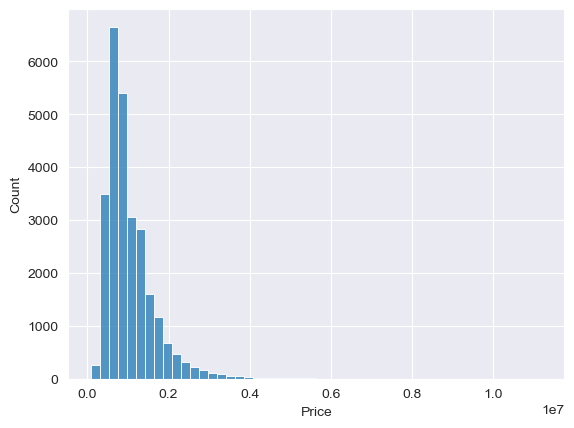

In [46]:
sns.histplot(df["Price"],bins=50)

C:\Users\ardaz\AppData\Local\Temp\ipykernel_12972\739806590.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


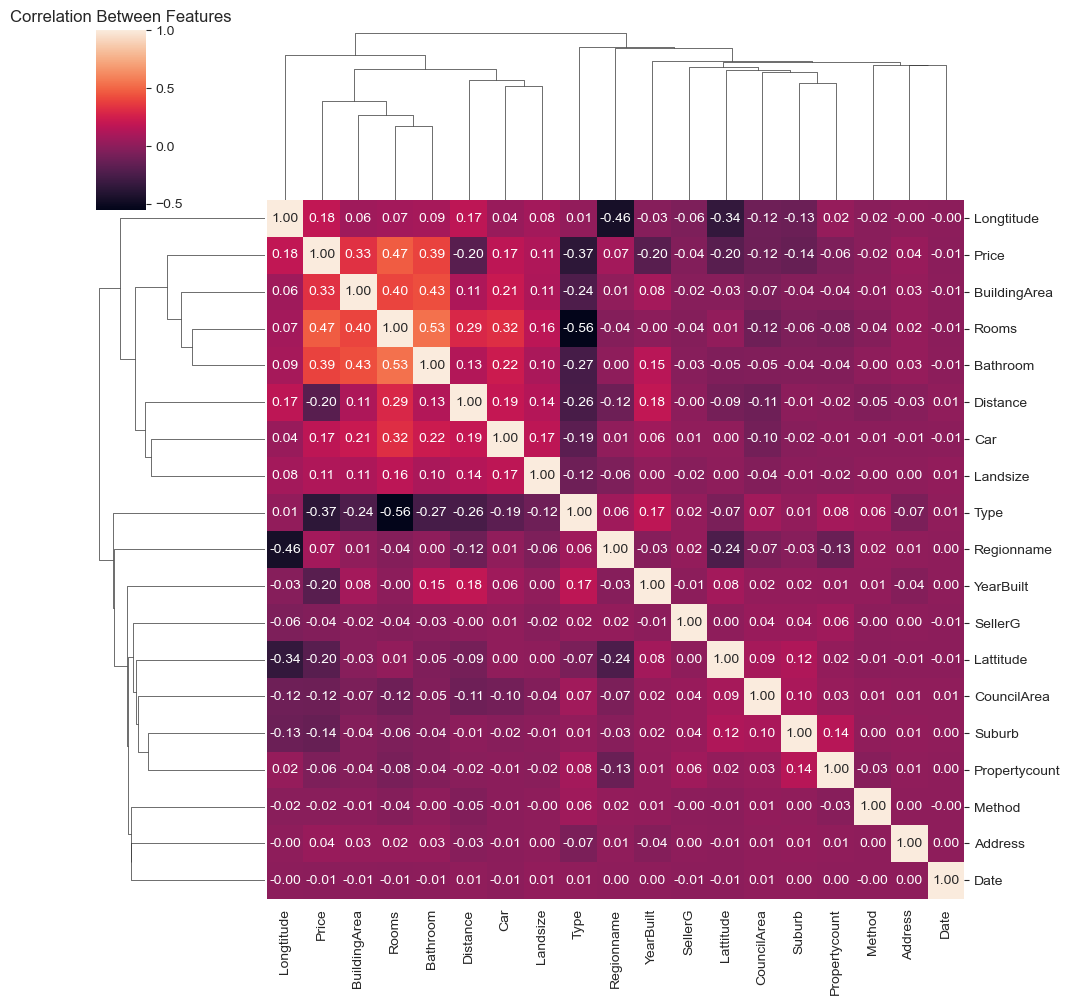

In [47]:
# Correlation Matrix

corr_matrix = df.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlation Between Features")
plt.show()

Train-Test Split and Scaling

In [48]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,25126,2.0,0,1480000.0,1,32,55,2.5,3067.0,1.0,1.0,202.0,133.0,1970.0,31,-37.7996,144.9984,2,4019.0
1,0,11944,2.0,0,1035000.0,1,32,64,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,31,-37.8079,144.9934,2,4019.0
2,0,19494,3.0,0,1465000.0,3,32,65,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,31,-37.8093,144.9944,2,4019.0
3,0,18050,3.0,0,850000.0,0,32,65,2.5,3067.0,2.0,1.0,94.0,133.0,1970.0,31,-37.7969,144.9969,2,4019.0
4,0,21005,4.0,0,1600000.0,4,206,66,2.5,3067.0,1.0,2.0,120.0,142.0,2014.0,31,-37.8072,144.9941,2,4019.0


In [50]:
x = df.drop(["Price", "Address"], axis = 1)
y = df["Price"]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)